In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import collections
import pandas as pd

from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


# Brouillon

In [2]:
def positions_points_dataset(class_nb, nb_holograms_class):
    
    # Initial position in the points dataset
    init = 0
    for nb in range(1, class_nb):
        init = nb * nb_holograms_class + init
    
    # Final position in the points dataset
    fin = 0
    for nb in range(1, class_nb + 1):
        fin = nb * nb_holograms_class + fin
    fin = fin - 1

    return init, fin

In [3]:
def load_points_dataset_one_class(data, class_nb, nb_holograms_class):
    
    # Initial and final position in the points dataset
    init, fin = positions_points_dataset(class_nb, nb_holograms_class)

    points_one_class = data[init:(fin + 1), :]
    
    return points_one_class

## Example

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [6]:
#Variables
# d = np.loadtxt("cars.csv", delimiter=",")
dataframe = pd.read_csv("cars.csv", delimiter=",")
dataframe

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438
...,...,...,...,...,...,...
958,22,0,11,8778,9829,1593
959,19,1,23,4850,3470,4742
960,28,1,28,9312,2720,12771
961,50,0,29,51343,8713,28511


In [7]:
dataset = dataframe.values
x = dataset[:,0:5]
y = dataset[:,5]
print(y.shape)
print(type(y))
y = np.reshape(y, (-1,1))
print(y.shape)
print(type(y))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

(963,)
<class 'numpy.ndarray'>
(963, 1)
<class 'numpy.ndarray'>
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [8]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [9]:
X_train.shape

(722, 5)

In [10]:
model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [12]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 577 samples, validate on 145 samples
Epoch 1/150
577/577 [==============================] - 0s 267us/sample - loss: 0.1662 - mean_squared_error: 0.1662 - mean_absolute_error: 0.3036 - val_loss: 0.1483 - val_mean_squared_error: 0.1483 - val_mean_absolute_error: 0.2821
Epoch 2/150
577/577 [==============================] - 0s 59us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - mean_absolute_error: 0.2474 - val_loss: 0.0958 - val_mean_squared_error: 0.0958 - val_mean_absolute_error: 0.2439
Epoch 3/150
577/577 [==============================] - 0s 50us/sample - loss: 0.0678 - mean_squared_error: 0.0678 - mean_absolute_error: 0.2111 - val_loss: 0.0629 - val_mean_squared_error: 0.0629 - val_mean_absolute_error: 0.2185
Epoch 4/150
577/577 [==============================] - 0s 66us/sample - loss: 0.0502 - mean_squared_error: 0.0502 - mean_absolute_error: 0.1965 - val_loss: 0.0540 - val_mean_squared_error: 0.0540 - val_mean_absolute_error: 0.2046
Epoch 5/150
577/577 [============

Epoch 36/150
577/577 [==============================] - 0s 81us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - mean_absolute_error: 0.0948 - val_loss: 0.0151 - val_mean_squared_error: 0.0151 - val_mean_absolute_error: 0.0924
Epoch 37/150
577/577 [==============================] - 0s 61us/sample - loss: 0.0163 - mean_squared_error: 0.0163 - mean_absolute_error: 0.0968 - val_loss: 0.0149 - val_mean_squared_error: 0.0149 - val_mean_absolute_error: 0.0920
Epoch 38/150
577/577 [==============================] - 0s 45us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - mean_absolute_error: 0.0944 - val_loss: 0.0154 - val_mean_squared_error: 0.0154 - val_mean_absolute_error: 0.0932
Epoch 39/150
577/577 [==============================] - 0s 47us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - mean_absolute_error: 0.0947 - val_loss: 0.0147 - val_mean_squared_error: 0.0147 - val_mean_absolute_error: 0.0912
Epoch 40/150
577/577 [==============================] - 0s 54us/sample - los

577/577 [==============================] - 0s 52us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - mean_absolute_error: 0.0898 - val_loss: 0.0134 - val_mean_squared_error: 0.0134 - val_mean_absolute_error: 0.0836
Epoch 107/150
577/577 [==============================] - 0s 50us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - mean_absolute_error: 0.0889 - val_loss: 0.0131 - val_mean_squared_error: 0.0131 - val_mean_absolute_error: 0.0830
Epoch 108/150
577/577 [==============================] - 0s 48us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - mean_absolute_error: 0.0903 - val_loss: 0.0132 - val_mean_squared_error: 0.0132 - val_mean_absolute_error: 0.0833
Epoch 109/150
577/577 [==============================] - 0s 48us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - mean_absolute_error: 0.0887 - val_loss: 0.0135 - val_mean_squared_error: 0.0135 - val_mean_absolute_error: 0.0837
Epoch 110/150
577/577 [==============================] - 0s 48us/sample - loss: 0.0147

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


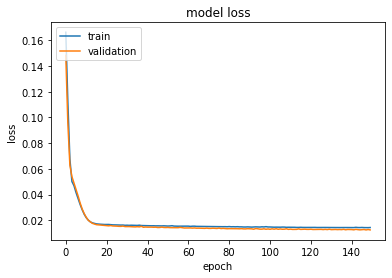

In [13]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
Xnew = np.array([[40, 0, 26, 9000, 8000]])
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(y_test) 
Xnew = scaler_x.inverse_transform(X_test)
pos = 20
print("X = %s, Predicted = %s" % (Xnew[pos, 4], ynew[pos]))

X = 8206.0, Predicted = [8240.]


In [2]:
def load_matlab_dictionary(file_path, file_name, key):
    '''
    Load the Matlab dictionary file and return the array as a numpy array.
    '''

    # Read mat file dictionary
    dictionary = scipy.io.loadmat(file_path + file_name)

    # Access item of a dictionary
    array = dictionary[key]

    return array

def load_hologram_dataset(file_path):
    '''
    Load the hologram dataset saved in a Matlab format. Note that it is
    a dictionary.
    '''

    # File names
    file_name = 'hDataset.mat'
    key = 'hDataset'

    # Load dictionary
    data = load_matlab_dictionary(file_path, file_name, key)

    return data

In [5]:
# Current directory
cwd = os.getcwd()

# Directory path
path = str((Path(cwd).parent).parent)

print('----- Loading hologram dataset... -----')

# File path
file_path = path + '\\output\\dataset\\'

# Load hologram (matfile dictionary)
hol_dataset = load_hologram_dataset(file_path)

----- Loading hologram dataset... -----


In [7]:
hol_dataset.shape
hol = hol_dataset[:,:,99]

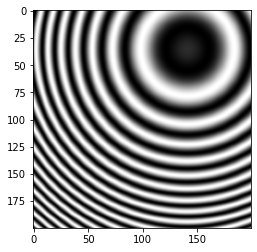

In [9]:
plt.imshow(np.real(hol), cmap='gray')

In [13]:
x_train = np.load(path + '\\neural_network\\' + 'classification_problem/X_train.npy')

In [16]:
df = pd.DataFrame(x_train)

In [23]:
df[99]

0       0.137470-0.344270j
1       0.141412+0.348272j
2       0.653838+0.475774j
3       0.927965+0.258164j
4       0.070244-0.255619j
               ...        
1995    0.693650-0.001074j
1996    0.413036-0.181343j
1997    0.424483+0.229607j
1998    0.390026+0.086609j
1999    0.599802-0.296341j
Name: 99, Length: 2000, dtype: complex128